In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
import itertools

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx') 
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.shape

(42, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

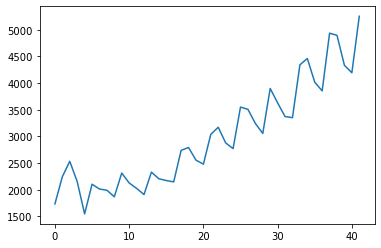

In [8]:
df['Sales'].plot()
plt.show()

In [9]:
# here the data flow is upward trend

<AxesSubplot:xlabel='Sales'>

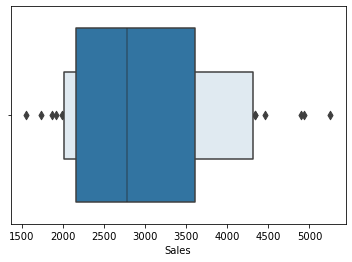

In [10]:
sns.boxenplot(df['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

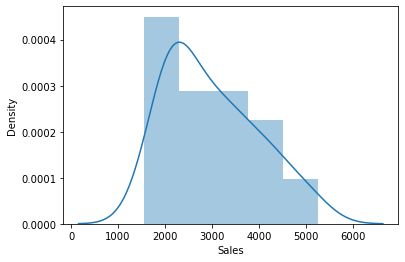

In [11]:
sns.distplot(df['Sales'])

In [12]:
#data processing

In [13]:
q=['Q1','Q2','Q3','Q4']
p=df['Quarter'][0]
#p[0:2]
df['quarter']=0


In [14]:
for i in range(0,42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

In [15]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [16]:
# getting dummies into quarters

In [17]:
dummies1=pd.DataFrame(pd.get_dummies(df['quarter']))
df_dummy=pd.concat([df,dummies1],axis=1)
df_dummy.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [41]:
df_dummy['t']=np.arange(0,42)
df_dummy['t_squared']=df_dummy['t']*df_dummy['t']
df_dummy['log_sales']=np.log(df_dummy['Sales'])

In [42]:
df_dummy.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,lod_sales,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602,7.344602


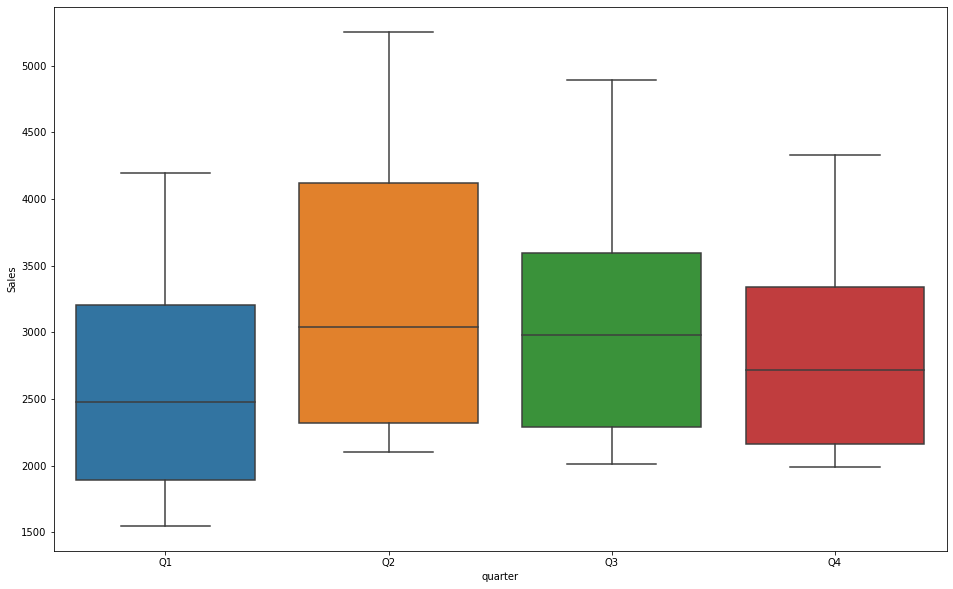

In [43]:
plt.figure(figsize=(16,10))
plt.subplot(111)
sns.boxplot(x='quarter',y='Sales',data=df_dummy)
plt.show()

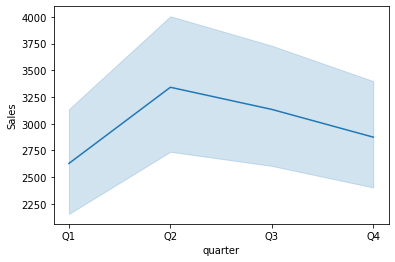

In [44]:
sns.lineplot(x='quarter',y='Sales',data=df_dummy)
plt.show()

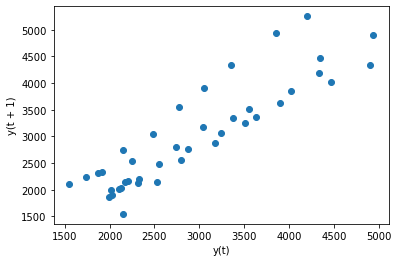

In [45]:
lag_plot(df_dummy['Sales'])
plt.show()

In [46]:
#ACF AND PACF Plot

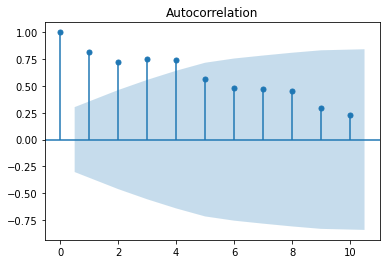

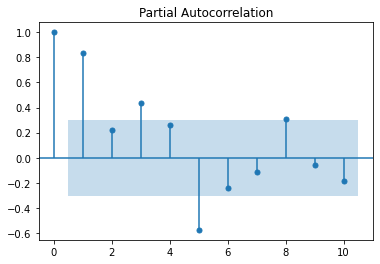

In [47]:
tsa_plots.plot_acf(df_dummy['Sales'],lags=10)
tsa_plots.plot_pacf(df_dummy['Sales'],lags=10)
plt.show()

In [48]:
# time series decomposition plots

In [49]:
s_plot=seasonal_decompose(df_dummy['Sales'],period=10)
s_plot

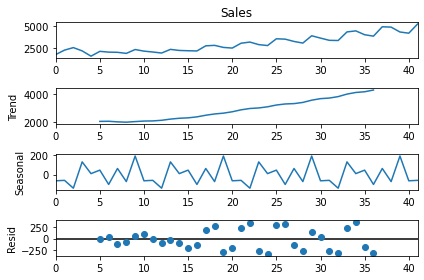

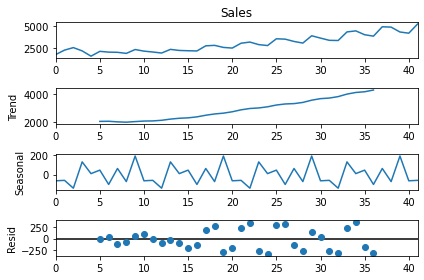

In [50]:
s_plot.plot()

In [51]:
# here we can see that how decompose effecting the data 

In [52]:
# split data into train and test

In [53]:
train=df_dummy.head(75)
test=df_dummy.head(25)

In [54]:
# model building

In [55]:
# model based forcatsing

# linear modeling

In [56]:
train.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,lod_sales,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602,7.344602


In [57]:
test.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,lod_sales,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602,7.344602


In [58]:
linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
print("rmse :",rmse_linear)

rmse : 358.6996021901795


# Exponential model

In [174]:
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("rmse  :",rmse_exp)

rmse  : 281.05791616552835


# quadratic

In [60]:
qard_model=smf.ols('Sales~t+t_squared',data=train).fit()
pred_qard=pd.Series(qard_model.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_qard=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_qard))**2))
print("rmse  :",rmse_qard)

rmse  : 241.89771455927266


# Additive seasonality

In [61]:
add_sea=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("rmse  :",rmse_add_sea)

rmse  : 769.7083333362243


# Additive Seasonality Quadratic

In [62]:
add_sea_qard=smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_qard=pd.Series(add_sea_qard.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))
rmse_a_s_q=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_qard))**2))
print("rmse :",rmse_a_s_q)

rmse : 161.1078953923166


# multiplicative seasonality

In [167]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE :",rmse_Mult_sea )

RMSE : 653.6475321400113


# multiplicative additive seasonality

In [72]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE :",rmse_Mult_add_sea )

RMSE : 208.75188145024268


# ** data driven forcating

### moving average

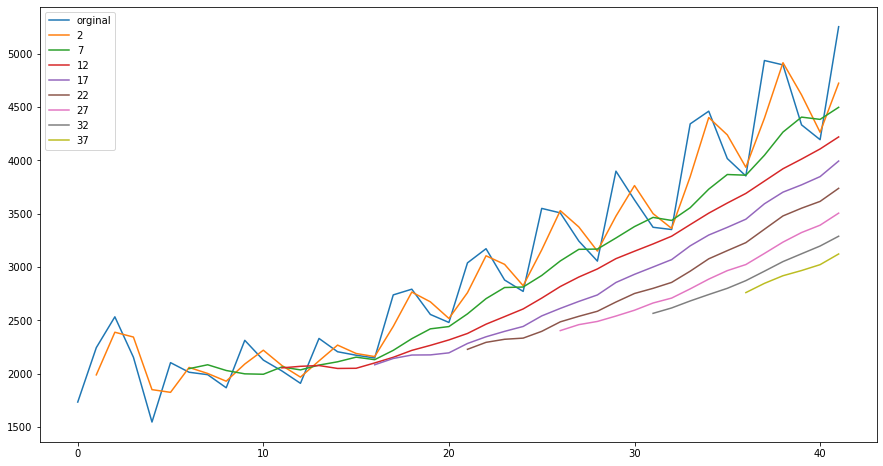

In [78]:
plt.figure(figsize=(15,8))
df_dummy['Sales'].plot(label="orginal")
for i in range(2,42,5):
    df_dummy['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")    
plt.show()

In [113]:
df_dummy['Sales'].rolling(12).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11    2055.393998
12    2070.042081
13    2077.225747
14    2049.954497
15    2051.538247
16    2101.576497
17    2154.484497
18    2219.350414
19    2266.372330
20    2317.365997
21    2377.856914
22    2464.839913
23    2535.854247
24    2607.637247
25    2709.206831
26    2817.660998
27    2906.818665
28    2982.462165
29    3079.103165
30    3148.790332
31    3216.872832
32    3289.458332
33    3397.998082
34    3505.405083
35    3600.238333
36    3690.404999
37    3805.904999
38    3921.488333
39    4012.250000
40    4107.083333
41    4219.916667
Name: Sales, dtype: float64

## simple exponential smoothing modeling

In [177]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])

rmse_ses=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_ses))**2))
print("rmse  :",rmse_ses)

rmse  : 321.0216332914447


## holt model

In [91]:
#two level of smoothing
holt_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_hm=holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hm))**2))
print('rmse  :',rmse_holt)

rmse  : 331.45269476277423


## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [93]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hwe_mul_add))**2))
print("rmse  :",hw_ma_rms)

rmse  : 169.4164956833267


##  Holts winter exponential smoothing with additive seasonality and multiplicative trend

In [168]:
hwe_model_mul_add2 = ExponentialSmoothing(train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add2.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms1=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hwe_mul_add))**2))
print("rmse  :",hw_ma_rms1)

rmse  : 200.86684933023724


## Holts winter exponential smoothing with additive seasonality and additive trend

In [169]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms2=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hwe_mul_add))**2))
print("rmse  :",hw_ma_rms2)

rmse  : 193.5434278251174


# ARMA

In [96]:
#here we using ar1 model

In [103]:
arma_model=ARMA(train['Sales'],order=(3,0))
arma_model_fit=arma_model.fit()
pred_arma=arma_model_fit.predict(start=test.index[0],end=test.index[-1])
arma_rms=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_arma))**2))
arma_rms

421.42796875932635

# ARIMA

In [104]:
rolLmean = df_dummy['Sales'].rolling(12).mean() # 12 entries
rolLstd = df_dummy['Sales'].rolling(12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

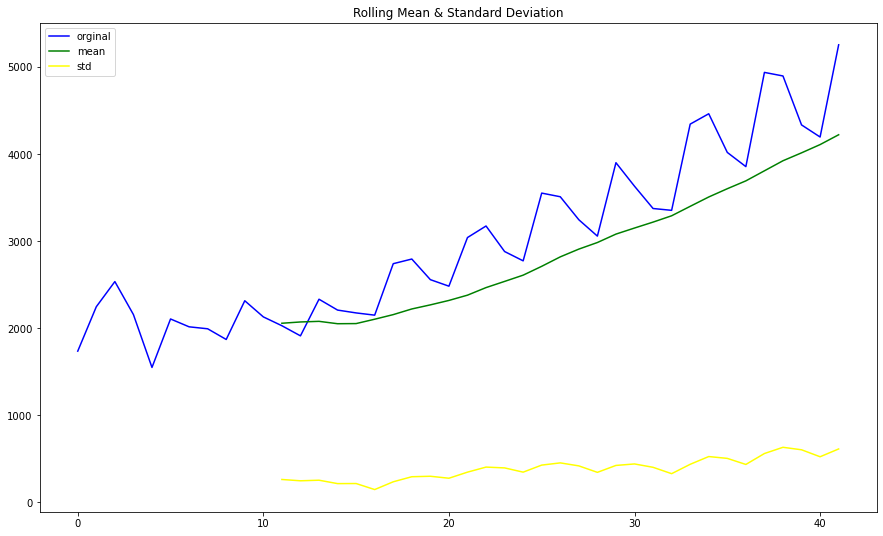

In [109]:
# plot rolling statistics
plt.figure(figsize=(15,9))
plt.plot(df_dummy['Sales'],color='blue',label='orginal')
plt.plot(rolLmean,color='green',label='mean')
plt.plot(rolLstd,color='yellow',label='std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [110]:
# here we can see that the data are not stationery

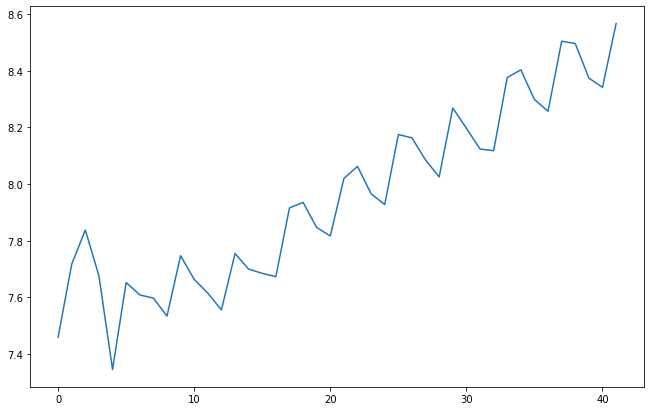

In [115]:
# data transform into stationery
plt.figure(figsize=(11,7))
ts_log=np.log(df_dummy['Sales'])
plt.plot(ts_log)

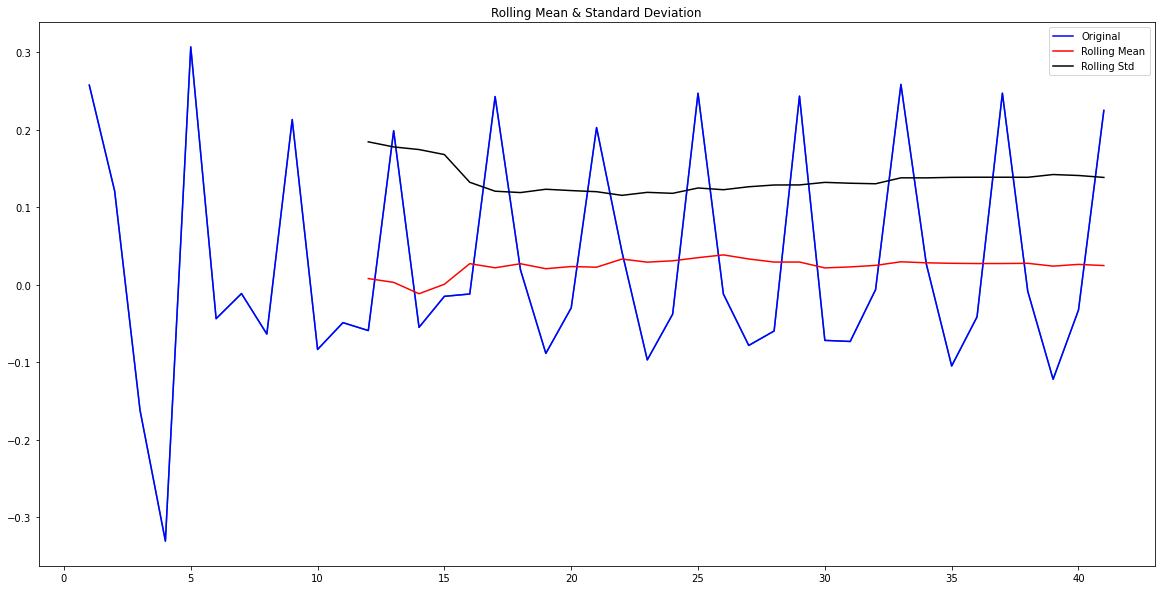

In [124]:
plt.figure(figsize=(20,10))
fig = plt.figure(1)
ts_log_diff=ts_log-ts_log.shift(periods=1)
plt.plot(ts_log_diff)

#determining rolling statistics
rolling_mean=ts_log_diff.rolling(12).mean()
rolling_std=ts_log_diff.rolling(12).std()

# plot rolling statistics
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [125]:
log_acf=acf(ts_log_diff,nlags=12)
log_pacf=pacf(ts_log_diff,nlags=12)

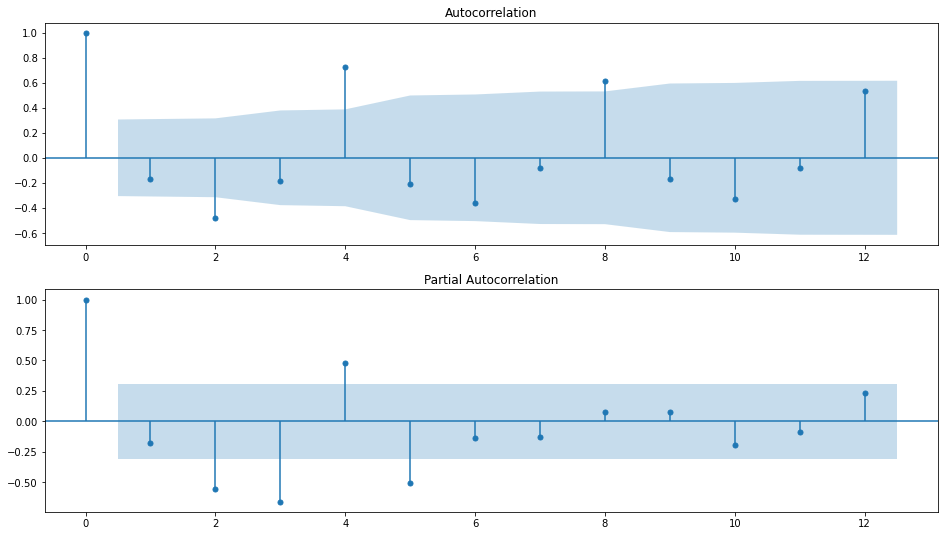

In [129]:
fig=plt.figure(figsize=(16,9))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [130]:
p=range(0,5)
d=range(0,5)
q=range(0,5)
pdq=list (itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [133]:
for param in pdq:
    try:
        model_arima=ARIMA(train['Sales'],order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 700.5556163745397
(0, 0, 1) 672.762736956785
(0, 0, 2) 638.008834749387
(0, 0, 3) 636.3109830688481
(0, 0, 4) 633.6839601305363
(0, 1, 0) 617.614937007783
(0, 1, 1) 607.2777519927466
(0, 1, 2) 606.1629102765434
(0, 1, 3) 600.7282513080645
(0, 1, 4) 580.4028970884216
(0, 2, 0) 633.3976676318601
(0, 2, 1) 608.9435813557418
(0, 2, 2) 593.1929075724838
(0, 2, 3) 618.5524422768312
(0, 2, 4) 588.2527507352424
(1, 0, 0) 637.530201123372
(1, 0, 1) 634.7258695324592
(1, 0, 2) 633.8105570855254
(1, 0, 3) 625.3717125511403
(1, 0, 4) 602.167359428431
(1, 1, 0) 618.8473071312175
(1, 1, 1) 608.7365920341316
(1, 1, 2) 607.9196281049088
(1, 1, 4) 582.3541746769844
(1, 2, 0) 632.8484102560508
(1, 2, 1) 610.3765649381041
(2, 0, 0) 639.2219342956333
(2, 0, 1) 636.2035733016971
(2, 0, 2) 635.6406372357883
(2, 0, 3) 622.8063221851376
(2, 0, 4) 604.1116129207412
(2, 1, 0) 597.8209706471662
(2, 1, 1) 591.3684932080126
(2, 2, 0) 622.1910624836162
(2, 2, 1) 588.8821823043415
(2, 2, 2) 574.84277062922

In [134]:
# (4,2,1) is gives the least aic value

In [160]:
arima_mod = sm.tsa.arima.ARIMA(train['Sales'], order=(4,2,1))
arima_mod_fit = arima_mod.fit()
print(arima_mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -266.396
Date:                Tue, 05 Apr 2022   AIC                            544.791
Time:                        17:34:23   BIC                            554.925
Sample:                             0   HQIC                           548.455
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3457      0.399     -0.865      0.387      -1.129       0.437
ar.L2         -0.3958      0.426     -0.929      0.353      -1.231       0.439
ar.L3         -0.3189      0.382     -0.834      0.4

In [165]:
pred_arima_mod=arima_mod_fit.predict(start=test.index[0],end=test.index[-1])


In [166]:
rms_arima=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_arima_mod))**2))
rms_arima

469.7336752538898

In [178]:
datas={"models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","ses_model","hw_model","hwe_model_mul_add","hwe_model_add_mul","hwe_model_add_add","ARMAmodel","ARIMAmodel"]),
      "rmse_values":pd.Series([rmse_linear,rmse_exp,rmse_qard,rmse_add_sea,rmse_a_s_q,rmse_Mult_sea,rmse_Mult_add_sea,rmse_ses,rmse_holt,hw_ma_rms,hw_ma_rms1,hw_ma_rms2,arma_rms,rms_arima])}
rmse_table=pd.DataFrame(datas)
rmse_table

,models,rmse_values
0,rmse_linear,358.699602
1,rmse_Exp,281.057916
2,rmse_Quad,241.897715
3,rmse_add_sea,769.708333
4,rmse_add_sea_quad,161.107895
5,rmse_Mult_sea,653.647532
6,rmse_Mult_add_sea,208.751881
7,ses_model,321.021633
8,hw_model,331.452695
9,hwe_model_mul_add,193.543428


### so here we can clearly see that Additive Seasonality Quadratic is gave less RMSE value

-------------------------